# Support_Vector_Machine
__it is classification algorithm__.<br>
__here we will solve a classification problem on iris flower.__ Based on it's features sepal size and petal size. The data set is available in sklearn data set. __We will determine whether the species is *Setosa*, *virginica* or *Versicolor*__

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### Data preprocessing

In [9]:
df = pd.DataFrame(iris.data, columns=iris.feature_names) #assigning feature_names to be our column names
df.head(60)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [10]:
# appending target to the dataframe
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
# what are the target label encoded values:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
# lets explore our data and see how many of our targets are 'setosa'
df[df.target==0]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [17]:
# lets add one more column called flower name. So for each value of x it generates a corresponding target flower name
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x]) # from one column we are trying to generate another column
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


#### do some data visualization

In [20]:
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
# seperating the three species into seperate data frames
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

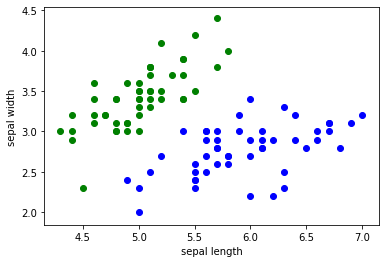

In [28]:
# visualizing the first two flowers
# 1.for sepals
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color='green')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color='blue')

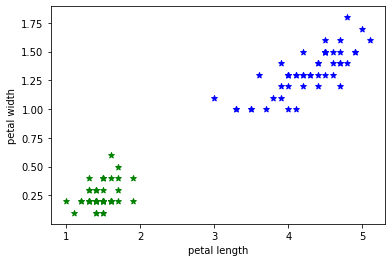

In [31]:
# 1.for petal
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color='green',marker='*')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='blue',marker='*')

### Training our model
__for training our model we use all the four features(widths and lengths of the sepals and the petals)__

In [32]:
# use train - test split
from sklearn.model_selection import train_test_split
x = df.drop(['target','flower_name'],axis='columns')
y = df.target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [33]:
# training the model now
from sklearn.svm import SVC
model = SVC(C=1) # you can tune the parameters in output bellow to perfect your model
model.fit(x_train,y_train) # you can tune the parameters in output bellow to perfect your model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
# accuracy of our model
model.score(x_test,y_test)

0.9666666666666667